# Before you start with this Vertex AI Notebook

This notebook is a sample for using Vertex AI with Vectice. It illustrates how to leverage Vertex AI with Vectice.

### Pre-requisites:
Before using this notebook you will need:
* An account in Vectice
* An API key to connect to Vectice through the APIs
* The Phase Id of the project where you want to log your work

Refer to Vectice Tutorial Guide for more detailed instructions: https://docs.vectice.com/getting-started/tutorial


### Other Resources
*   Vectice Documentation: https://docs.vectice.com/ </br>
*   Vectice API documentation: https://api-docs.vectice.com/

In [ ]:
import os
import vectice
from vectice import connect, Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get started by connecting to Vectice

You can learn more about the `Connection` object in the [documentation](https://api-docs.vectice.com/reference/vectice/connection/)

**First, we need to authenticate to the Vectice server. Before proceeding further:**

- Visit the Vectice app to create and copy an API key (cf. https://docs.vectice.com/getting-started/create-an-api-key)

- Paste the API key in the code below

In [ ]:
connect = vectice.connect(api_token="my_api_key")

In [ ]:
iteration = connect.phase("PHA-xxxx").create_iteration()

# Log Model With Vertex AI & Then Vectice
- Log the Ridge model we created with the feature importance graph as attachment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from google.cloud import aiplatform

aiplatform.init(experiment="ridge-regression-001")

# Assign the experiment run to a variable to easily capture metrics and parameters with Vectice
experiment_run = aiplatform.start_run("run-003")

OHE = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

cat_cols = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code','Region', 'Category', 'Sub-Category']
num_cols = ['Quantity', 'Discount', 'Profit']

transformer = ColumnTransformer([('cat_cols', OHE, cat_cols),
                                ('num_cols', scaler, num_cols)])

model = make_pipeline(transformer,Ridge())
model.fit(X_train,y_train)

# Making Prediction with the training data
y_train_pred = model.predict(X_train)


# Evaluating the model 
mae_train=mean_absolute_error(y_train, y_train_pred)
print(round(mae_train,2))

# Making prediction on test
y_test_pred = model.predict(X_test)

# Evaluating the model 
mae_test = mean_absolute_error(y_test, y_test_pred)
print(round(mae_test,2))

aiplatform.log_model(model)

aiplatform.log_metrics({"mae_train": round(mae_train,2), "mae_test": round(mae_test,2)})

parameters = {key: str(val) for key, val in model.named_steps.items()}

aiplatform.log_params(parameters)

aiplatform.end_run()

## Log the Ridge model with Vectice
- You can log everything as you do in Vertex AI
- However, with Vectice you can pass attachments such as graphs too

In [ ]:
# Create the Vectice Model by passing the experiment run to the Model wrapper
vect_model = vectice.Model.vertex(experiment_run)
# Log the model into Vectice
iteration.log(vect_model)

#### Retrieve a past Vertex Experiment
- You can retrieve a past Experiment and capture with Vectice with the following
- Then simply pass these to the `vectice.Model`
- You can see the experiment and run name below, which are required to retrieve the experiment run

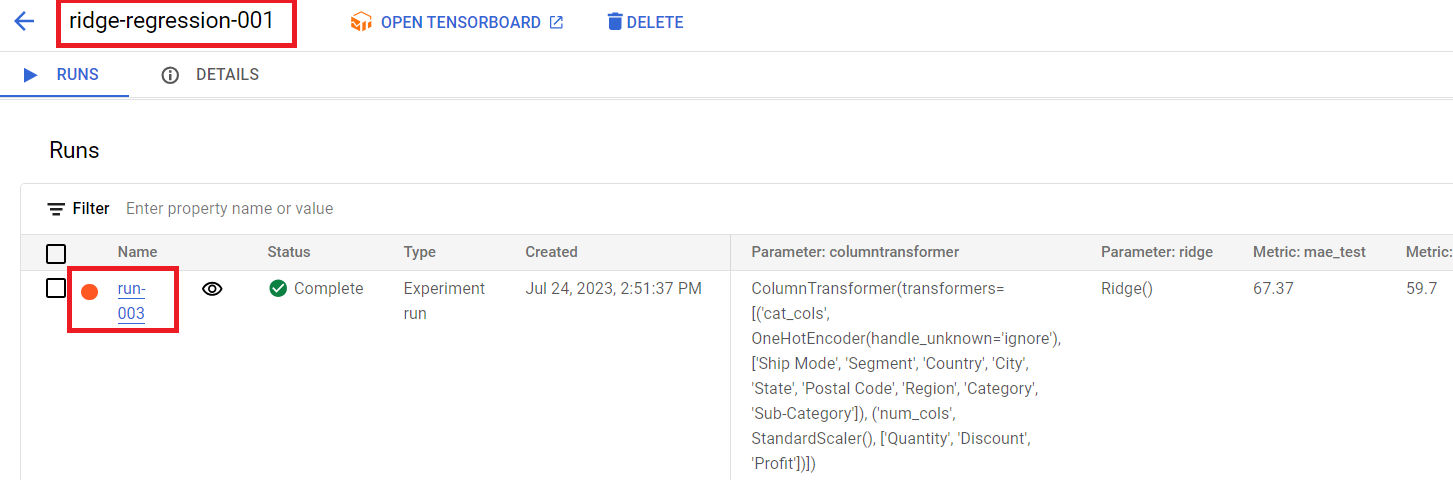

In [ ]:
# Retrieve past experiments and capture them with Vectice, the experiment name and run name are required
experiment_run = aiplatform.ExperimentRun("run-003", "ridge-regression-001")

In [ ]:
# Create the Vectice Model
vect_model = vectice.Model.vertex(experiment_run)

In [ ]:
# Log the model into Vectice
iteration.log(vect_model)